<a href="https://colab.research.google.com/github/mantalixs/1/blob/main/IW2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#імпортуємо необхідні бібліотеки для кластеризації
import numpy as np
import pandas as pd

In [26]:
#імпортуємо датасет
from google.colab import files
uploaded=files.upload()

Saving dataset.xlsx to dataset (1).xlsx


In [27]:
dataset=pd.read_excel(open('dataset.xlsx', 'rb'))
#переглядаємо датасет
dataset.shape
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             3968 non-null   object 
 1   capital_intencity_growh  3968 non-null   object 
 2   gdp_per_capita           3968 non-null   float64
 3   capital_per_worker       3968 non-null   float64
 4   return_on_capital        3968 non-null   float64
 5   trade_globalization      3968 non-null   float64
 6   trade_asymmetry          3968 non-null   float64
 7   tax_burden               3968 non-null   float64
 8   consumption_rate         3968 non-null   float64
 9   savings_rate             3968 non-null   float64
 10  gdp_growh                3968 non-null   float64
 11  pop_growh                3968 non-null   float64
 12  inflation_rate           3968 non-null   float64
 13  unemployment_rate        3968 non-null   float64
 14  gdp_agriculture         

In [28]:
i = 0
while i<len(dataset):
    if dataset.capital_intencity_growh[i]=='decreasing':
        dataset.capital_intencity_growh[i]=0
    else:
        dataset.capital_intencity_growh[i]=1
    i=i+1


Показано результат, скорочений до останніх рядків (5000).
Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset.capital_intencity_growh[i]=1
<ipython-input-28-a0c1d8b03306>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.capital_intencity_growh[i]=1
<ipython-input-28-a0c1d8b03306>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to upd

In [29]:
#формуємо вибірки даних
data_y = dataset['capital_intencity_growh'].astype(float).values
data_x = dataset.select_dtypes(exclude=['object']).values

#розбиваємо вибірки даних на тестову та трейнову
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state=42)

In [30]:
#KNN
n_neighbors=10

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(train_x, train_y)

#результати
predicted = model.predict(test_x)
predicted_p = model.predict_proba(test_x)
predicted_train = model.predict(train_x)
predicted_p_train = model.predict_proba(train_x)

In [31]:
#тестування класифікації
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

print("Test accuracy:", accuracy_score(test_y, predicted))
print("Test F1:", f1_score(test_y, predicted))
print("Train accuracy:", accuracy_score(train_y, predicted_train))
print("Train F1:", f1_score(train_y, predicted_train))

print("Test AUC:", roc_auc_score(
    y_score = predicted_p[:,1],
    y_true = test_y)
)
print("Train AUC:", roc_auc_score(
    y_score= predicted_p_train[:,1],
    y_true = train_y)
)

Test accuracy: 0.5969773299748111
Test F1: 0.7064220183486238
Train accuracy: 0.6984877126654064
Train F1: 0.768449068473264
Test AUC: 0.5674144879980025
Train AUC: 0.7434241238786108


In [32]:
print(predicted_p.shape)

(794, 2)


<Axes: xlabel='treshold'>

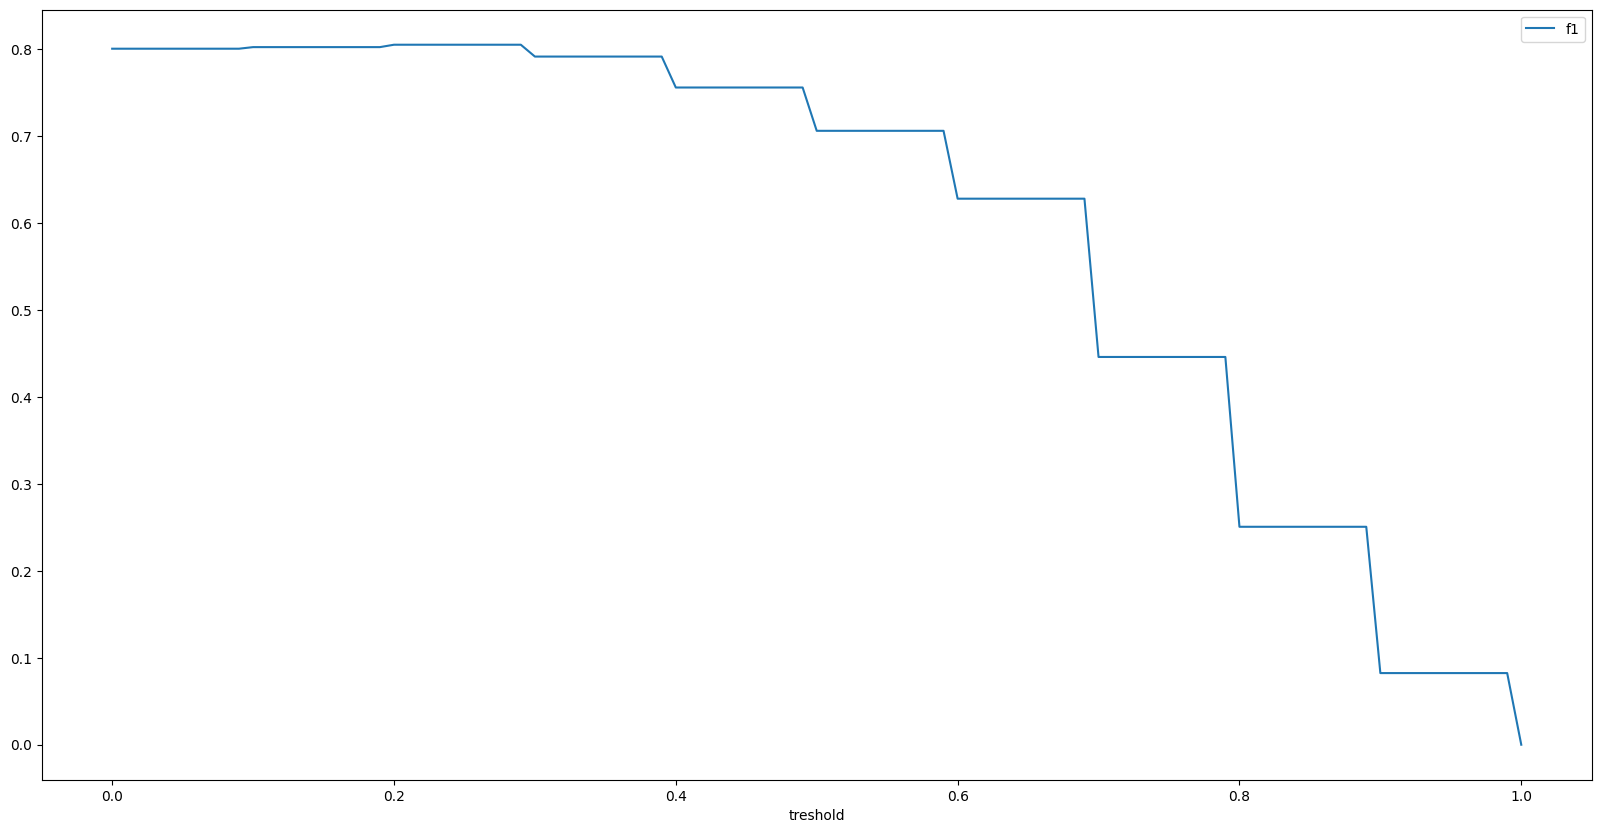

In [33]:
#графік порогу класифікації
tresh  = {i: f1_score(test_y, (predicted_p[:,1] > i).astype('int')) for i in np.array(list(range(101)))/100}
pd.DataFrame({
    'treshold': list(tresh.keys()),
    'f1': list(tresh.values())
}).plot.line(x='treshold', y ='f1')

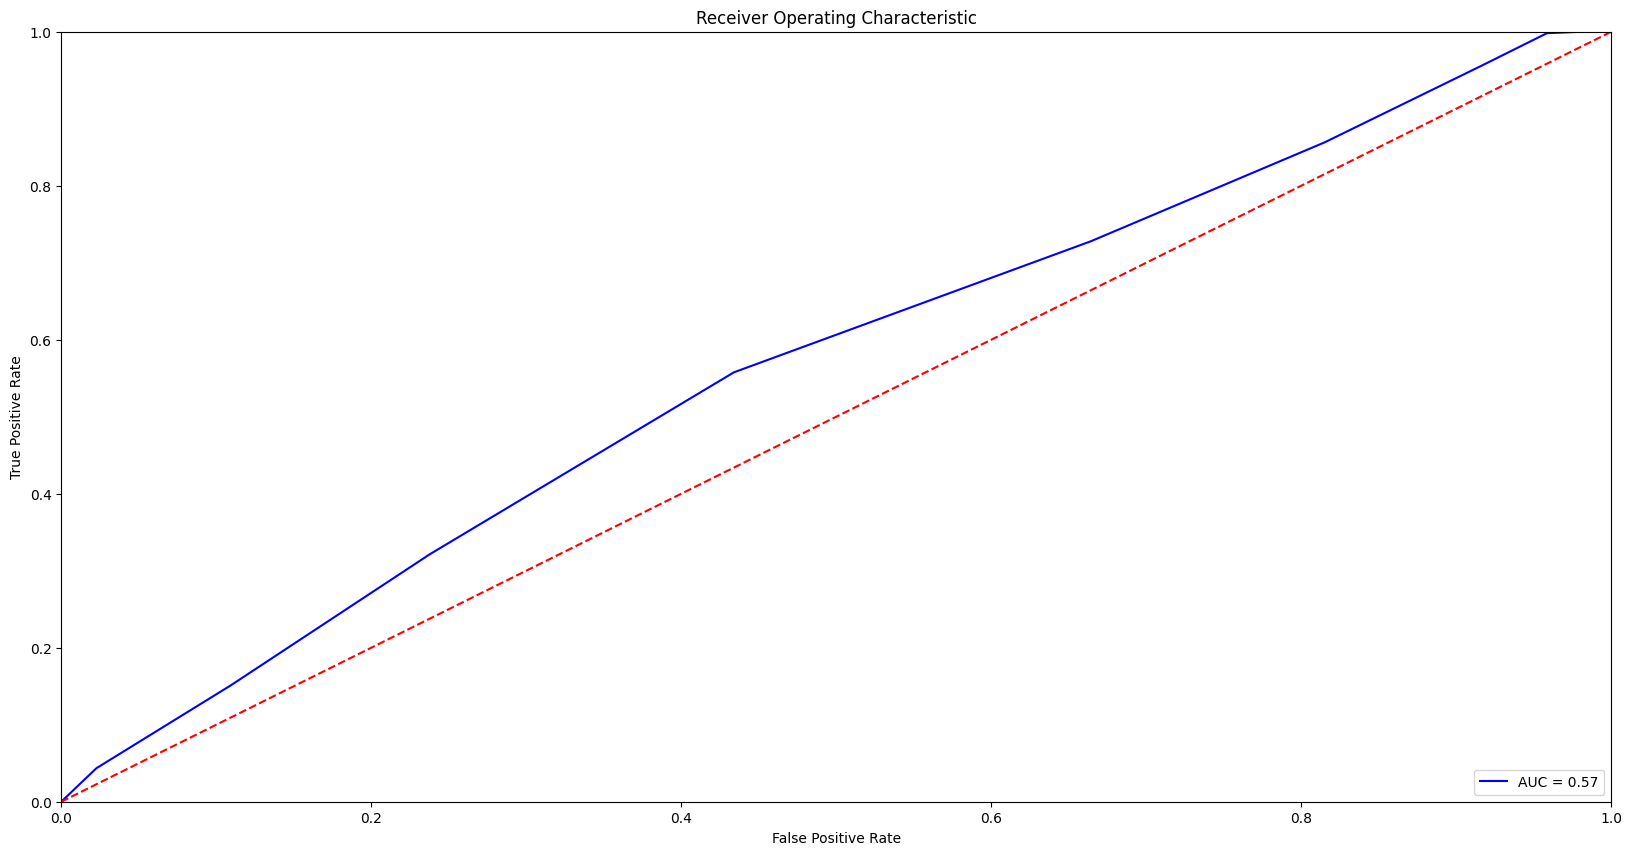

In [34]:
#ROC крива
fpr, tpr, threshold = roc_curve(test_y, predicted_p[:,1])
roc_auc = auc(fpr, tpr)
fpr, tpr, threshold

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
#класифікація з кількістю сусідів від 2 до 20
for i in range(2, 21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_x, train_y)
    predicted_p = model.predict_proba(test_x)
    predicted_p_train = model.predict_proba(train_x)
    print(i, "TEST:", roc_auc_score(y_score=predicted_p[:,1], y_true=test_y), "TRAIN:",roc_auc_score(y_score=predicted_p_train[:,1], y_true=train_y))


2 TEST: 0.5482362592288761 TRAIN: 0.9000946113611796
3 TEST: 0.5422049434675608 TRAIN: 0.8572704085467171
4 TEST: 0.5672361522274137 TRAIN: 0.8238888748119475
5 TEST: 0.5725398580447265 TRAIN: 0.8006227686556812
6 TEST: 0.5883832079038415 TRAIN: 0.7810200075328337
7 TEST: 0.5914042158576167 TRAIN: 0.7701613890304934
8 TEST: 0.5746905874380284 TRAIN: 0.7614382902442931
9 TEST: 0.567874594286122 TRAIN: 0.7511663223065073
10 TEST: 0.5674144879980025 TRAIN: 0.7434241238786108
11 TEST: 0.5639298070406962 TRAIN: 0.735767174452957
12 TEST: 0.5664443414059992 TRAIN: 0.7314832510404887
13 TEST: 0.5635481684916361 TRAIN: 0.726817102882447
14 TEST: 0.5680279630488283 TRAIN: 0.7172249796325747
15 TEST: 0.5736954738381423 TRAIN: 0.7125483095573796
16 TEST: 0.5774369583050969 TRAIN: 0.7050509067530524
17 TEST: 0.577818596854157 TRAIN: 0.7001442576315035
18 TEST: 0.5813389449655813 TRAIN: 0.6946788732358073
19 TEST: 0.5815743481827584 TRAIN: 0.6924559571873928
20 TEST: 0.5813282448193459 TRAIN: 0.690

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(C=0.001, class_weight="balanced", n_jobs=-1)
lf = log_reg.fit(train_x, train_y)
y_pred = lf.predict(test_x)

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))
print("Accuracy: " + str(accuracy_score(test_y, y_pred)))
print("F1 score: " + str(f1_score(test_y, y_pred)))
y_pred_p = lf.predict_proba(test_x)
print("AUC: " + str(roc_auc_score(y_score=y_pred_p[:,1], y_true=test_y-1)))

[[140 125]
 [204 325]]
              precision    recall  f1-score   support

         0.0       0.41      0.53      0.46       265
         1.0       0.72      0.61      0.66       529

    accuracy                           0.59       794
   macro avg       0.56      0.57      0.56       794
weighted avg       0.62      0.59      0.60       794

Accuracy: 0.5856423173803527
F1 score: 0.6639427987742594
AUC: 0.5901986660484361


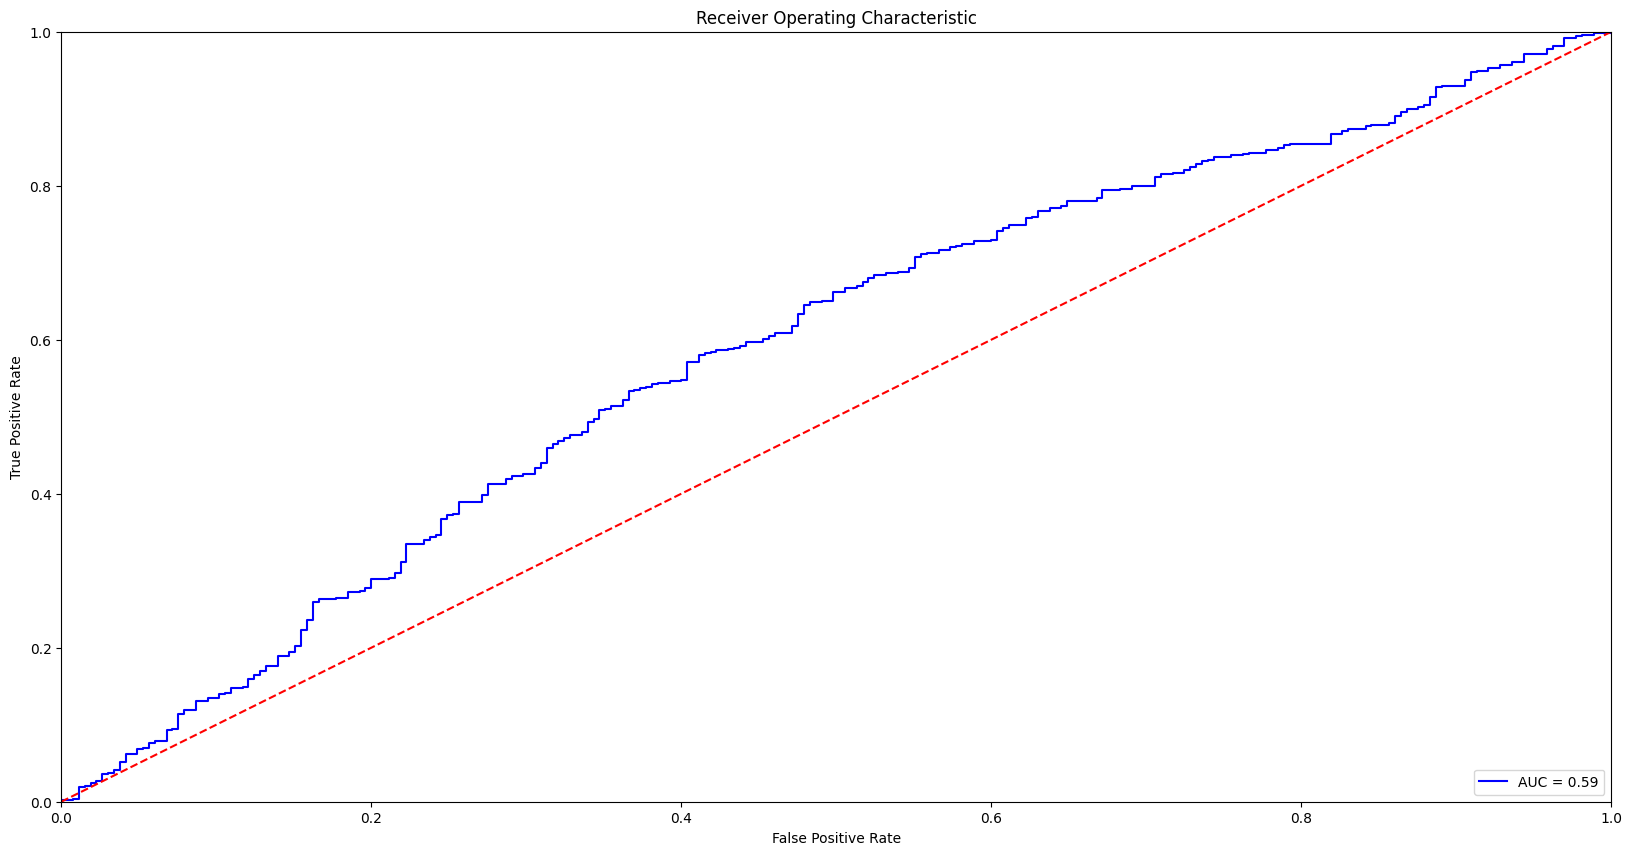

In [37]:
#ROC крива
fpr, tpr, threshold = roc_curve(test_y, y_pred_p[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
#класифікація з масивом параметрів регуляризації
for i in [1,0.5,0.1,0.01,0.001,0.0001,0.0000001]:
    log_reg = LogisticRegression(C=i, class_weight="balanced", n_jobs=-1)
    lf = log_reg.fit(train_x, train_y)
    y_pred_p = lf.predict_proba(test_x)
    print(i," - AUC: " + str(roc_auc_score(y_score=y_pred_p[:,1], y_true=test_y)))

1  - AUC: 0.5912187466562042
0.5  - AUC: 0.59913685487035
0.1  - AUC: 0.5876377643827799
0.01  - AUC: 0.6159931519064095
0.001  - AUC: 0.5901986660484361
0.0001  - AUC: 0.5882084388486643
1e-07  - AUC: 0.555701394585726


In [39]:
#Naive Bayes
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb = gnb.fit(train_x, train_y)
y_pred = nb.predict_proba(test_x)
print("AUC: " + str(roc_auc_score(y_score=y_pred[:,1], y_true=test_y)))

AUC: 0.5480436565966402


In [40]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
nb = clf.fit(train_x, train_y)
y_pred = nb.predict_proba(test_x)
print("AUC: " + str(roc_auc_score(y_score=y_pred[:,1], y_true=test_y)))

AUC: 0.5211577558226629


In [41]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=21,
    max_features=0.9,
    criterion="gini",
    random_state=2)

dt = tree_clf.fit(train_x, train_y)
y_pred = dt.predict_proba(test_x)
print("AUC: " + str(roc_auc_score(y_score=y_pred[:,1], y_true=test_y)))

AUC: 0.5814245461354639


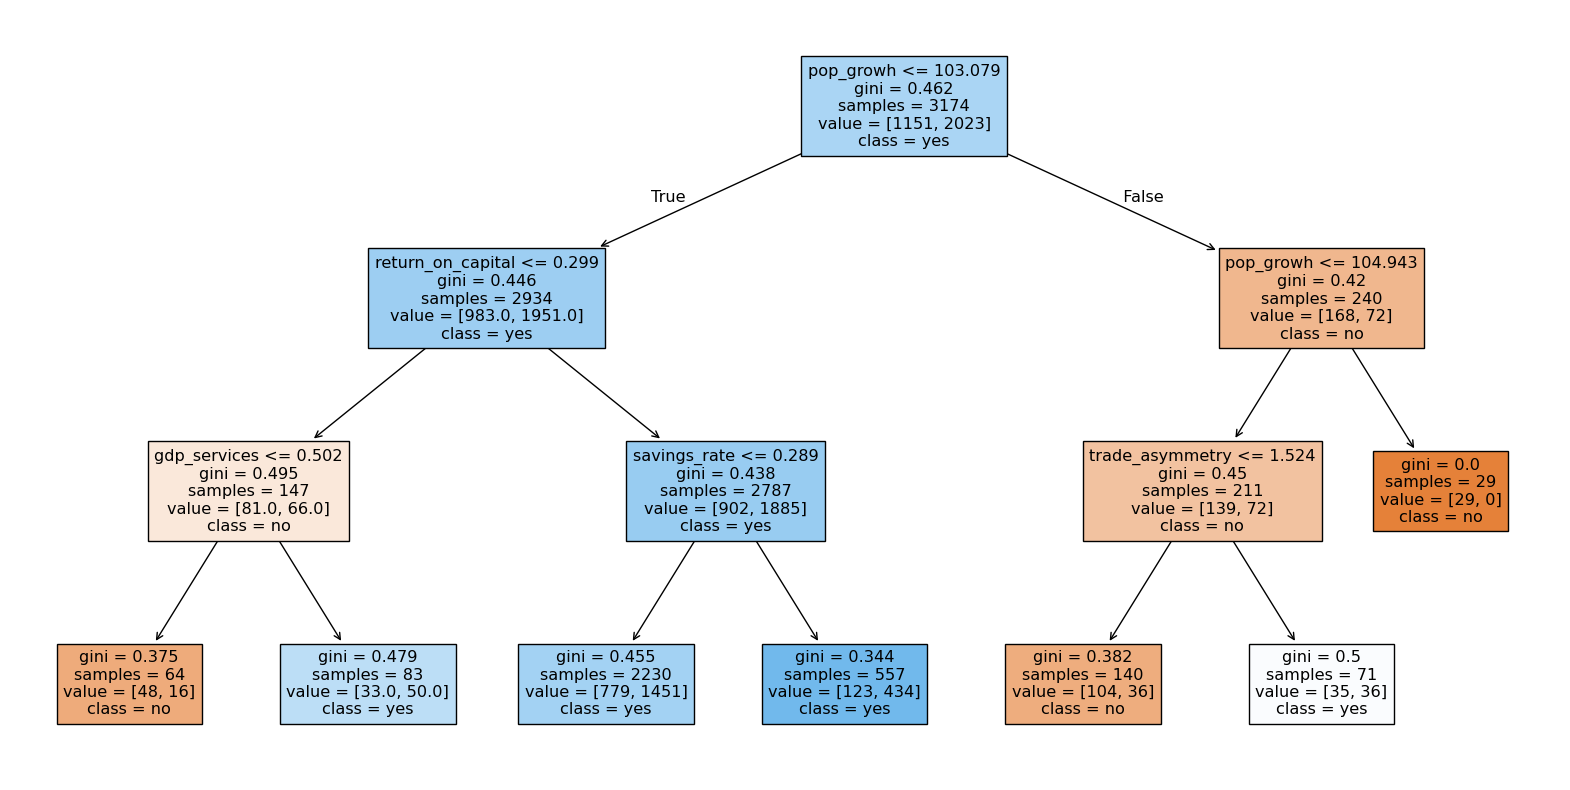

In [42]:
#будуємо граф дерева рішень
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plot_tree(dt, filled=True, class_names=['no','yes'],
          feature_names=dataset.select_dtypes(exclude=['object']).columns)
plt.show()

In [43]:
#класифікація з масивами гіперпараметрів дерева рішень
for i in range(5,11):
    for j in range(10,21):
        tree_clf = DecisionTreeClassifier(max_depth=i,
                                          min_samples_leaf=j,
                                          max_features=0.9,
                                          criterion="gini",
                                          random_state=2)
        dt = tree_clf.fit(train_x, train_y)
        y_pred = dt.predict_proba(test_x)
        print("Depth: "+str(i)+" Leaf: "+str(j)+"- AUC: " + str(roc_auc_score(y_score=y_pred[:,1], y_true=test_y-1)))


Depth: 5 Leaf: 10- AUC: 0.614734101366052
Depth: 5 Leaf: 11- AUC: 0.61886435781289
Depth: 5 Leaf: 12- AUC: 0.619845204551129
Depth: 5 Leaf: 13- AUC: 0.6190462602988908
Depth: 5 Leaf: 14- AUC: 0.6190498270143026
Depth: 5 Leaf: 15- AUC: 0.6188108570817135
Depth: 5 Leaf: 16- AUC: 0.6273424403466848
Depth: 5 Leaf: 17- AUC: 0.60515747048543
Depth: 5 Leaf: 18- AUC: 0.5974105646110497
Depth: 5 Leaf: 19- AUC: 0.5991796554552913
Depth: 5 Leaf: 20- AUC: 0.5991796554552913
Depth: 6 Leaf: 10- AUC: 0.5992866569176445
Depth: 6 Leaf: 11- AUC: 0.6047294646360166
Depth: 6 Leaf: 12- AUC: 0.6024646003495382
Depth: 6 Leaf: 13- AUC: 0.6022933980097729
Depth: 6 Leaf: 14- AUC: 0.6022969647251845
Depth: 6 Leaf: 15- AUC: 0.602257730855655
Depth: 6 Leaf: 16- AUC: 0.6021079288083603
Depth: 6 Leaf: 17- AUC: 0.6028462388985983
Depth: 6 Leaf: 18- AUC: 0.5989264186610551
Depth: 6 Leaf: 19- AUC: 0.6129792773834575
Depth: 6 Leaf: 20- AUC: 0.6102543068088597
Depth: 7 Leaf: 10- AUC: 0.6419410065270892
Depth: 7 Leaf: 11-

In [44]:
#MLP
from sklearn.neural_network import MLPClassifier

#lbfgs solver
nn_clf = MLPClassifier(solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(5, 20), random_state=1, max_iter=10000)
nn_clf.fit(train_x, train_y)

print("AUC: " + str(roc_auc_score(y_score=nn_clf.predict_proba(test_x)[:, 1], y_true=test_y)))

AUC: 0.557270749366908


In [45]:
#adam solver
nn_clf = MLPClassifier(solver='adam', learning_rate_init=0.00001, alpha=1,
                    hidden_layer_sizes=(13, 3), random_state=1, max_iter=100000, verbose = True)
nn_clf.fit(train_x, train_y)

print("AUC: " + str(roc_auc_score(y_score=nn_clf.predict_proba(test_x)[:, 1], y_true=test_y)))

Iteration 1, loss = 23.03380414
Iteration 2, loss = 23.03377861
Iteration 3, loss = 23.03375309
Iteration 4, loss = 23.03372763
Iteration 5, loss = 23.03370213
Iteration 6, loss = 23.03367670
Iteration 7, loss = 23.03365125
Iteration 8, loss = 23.03362583
Iteration 9, loss = 23.03360049
Iteration 10, loss = 23.03357509
Iteration 11, loss = 23.03354964
Iteration 12, loss = 23.03352423
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
AUC: 0.5000142668616471


In [46]:
#LDA & QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

#QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis(reg_param=0.0001)
clf.fit(train_x, train_y)

y_pred = clf.predict_proba(test_x)

print("AUC: " + str(roc_auc_score(y_score=y_pred[:,1], y_true=test_y)))

AUC: 0.662460320291044


In [47]:
#LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
clf.fit(train_x, train_y)

y_pred = clf.predict_proba(test_x)

print("AUC: " + str(roc_auc_score(y_score=y_pred[:,1], y_true=test_y)))

AUC: 0.6602917573206833


In [48]:
#SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC

svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=0.0000001))
))
svm_clf.fit(train_x, train_y)
p = svm_clf.predict(test_x)

print(confusion_matrix(test_y, p))
print(classification_report(test_y, p))
print("Accuracy:", str(accuracy_score(test_y, p)))

[[145 120]
 [184 345]]
              precision    recall  f1-score   support

         0.0       0.44      0.55      0.49       265
         1.0       0.74      0.65      0.69       529

    accuracy                           0.62       794
   macro avg       0.59      0.60      0.59       794
weighted avg       0.64      0.62      0.63       794

Accuracy: 0.6171284634760705
